# Analysis of Covid-19 NYC data
Looking at waves.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import utilities as u

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['figure.autolayout'] = True

def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
dat = u.load_data()
dat = u.add_averages(dat)

In [4]:
dat.head()

,NEW_COVID_CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG,...,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE,"Cases/day, 7 day avg","Hospitalized/day, 7 day avg","Deaths/day, 7 day avg"
DATE_OF_INTEREST,,,,,,,,,,,,,,,,,,,,,
2020-02-29,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.000000,1.000000,0.0
2020-03-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.500000,1.000000,0.0
2020-03-02,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.333333,1.333333,0.0
2020-03-03,1,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.500000,2.750000,0.0
2020-03-04,5,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.400000,2.600000,0.0


# Latest report
We generate a bar chart of the new cases/day.  Since there's weekly cyclicity, we also graph the 7 day rolling average.  The latter allows one to better see trends.  But the analysis is hampered by reporting delays - many sites don't promptly report the data.

## Full history
Note that the 7 day rolling average clearly shows the trends

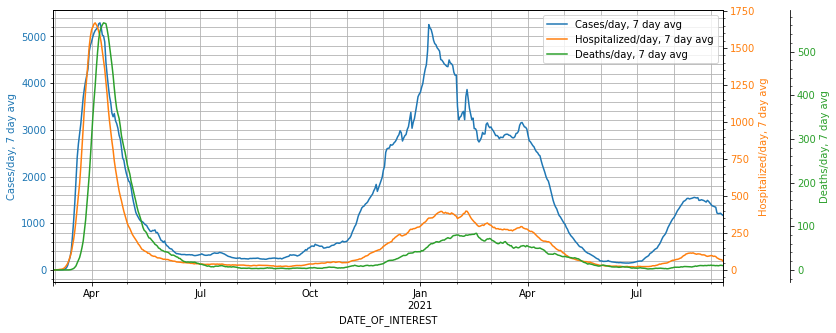

In [5]:
u.plot_multi(dat[u.rolling_avg_cols], figsize=(12, 5))

## First wave

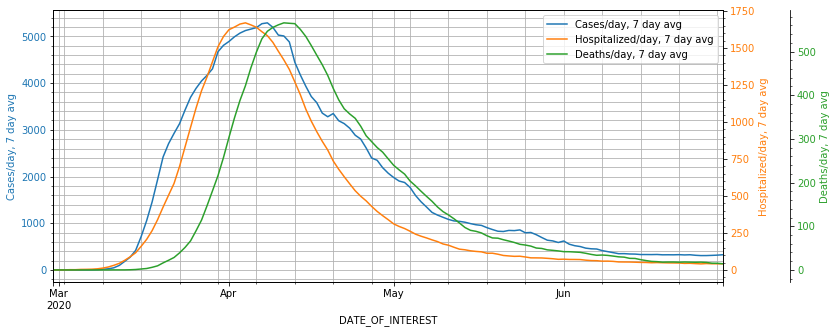

In [6]:
start, end = u.get_wave("one")
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Second wave

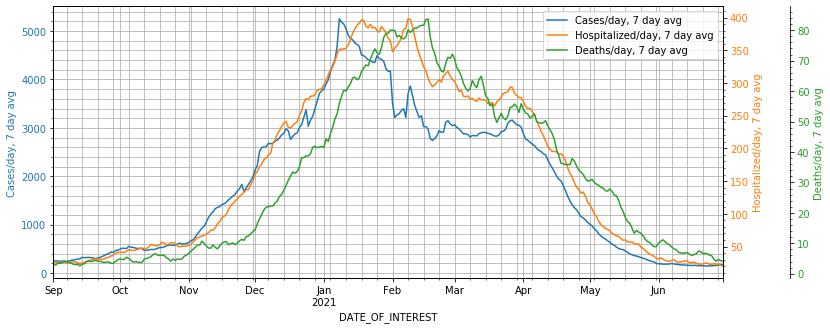

In [7]:
start, end = u.get_wave("two")
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Third wave

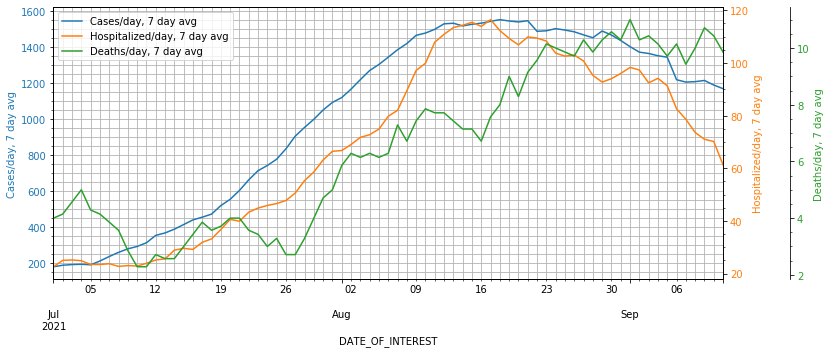

In [8]:
start, end = u.get_wave("three")
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

# Peak analysis

## First wave
Oddly, cases/day peaked after hospitalized/day.  Cases/day peak is 4 days *after* hospitalized/day peak.  Deaths/day peak is 3 days later.

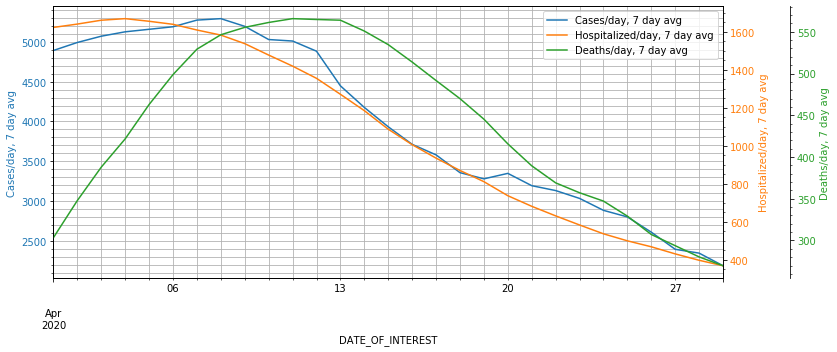

In [9]:
start = "2020-04-01"
end = "2020-04-30"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Second wave
Delays are different.  Peak hospitalized/day is 10 days after peak cases/day.  Peak deaths/day is ~Feb 16, vs Jan 8, about 39 days. 

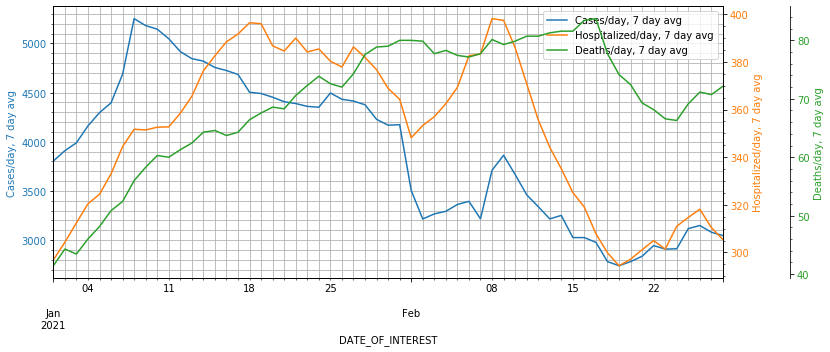

In [10]:
start = "2021-01-01"
end = "2021-03-01"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

# Rates
Looking at rates per case, but with shifts to account for delays

In [11]:
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"]/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"]/dat["Cases/day, 7 day avg"]

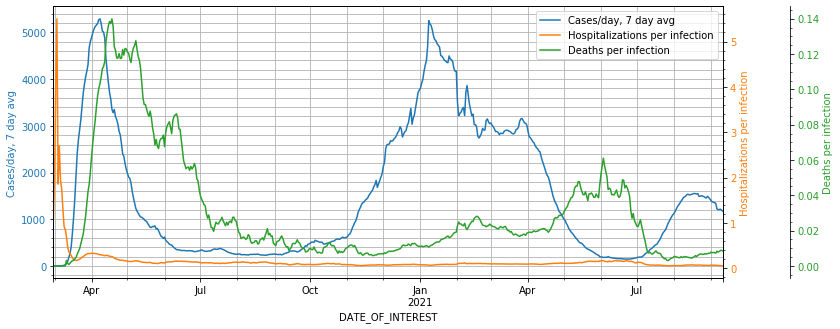

In [12]:
u.plot_multi(dat[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

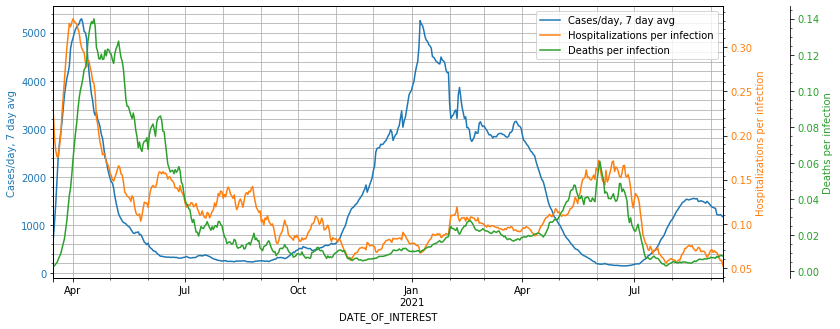

In [13]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## 7 day shift

In [14]:
shift = 7
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]

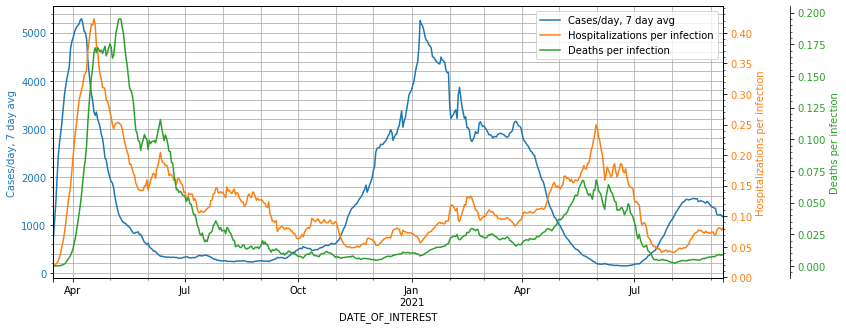

In [15]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## 14 day shift

In [16]:
shift = 14
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]

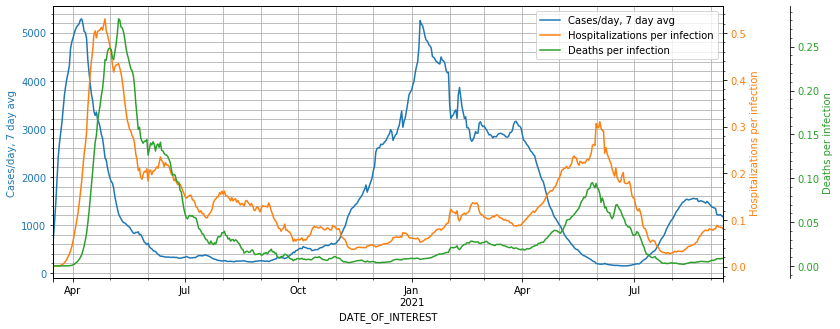

In [17]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## Lots of shifts

In [18]:
"""
start = "2020/03/15"

statresults = pd.DataFrame(columns=["shift", "h/i mean", "h/i std", "d/i mean", "d/i std"])

for shift in range(-30, 30):
    dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
    dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
    period = dat[dat.index > start]
    u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))
    print(f"Rates shifted by {shift} days")
    stats = period[["Cases/day, 7 day avg",
                    "Hospitalizations per infection",
                    "Deaths per infection"]].describe()
    display(stats)
    plt.title(f"Rates shifted by {shift} days")
    plt.show()
"""

'\nstart = "2020/03/15"\n\nstatresults = pd.DataFrame(columns=["shift", "h/i mean", "h/i std", "d/i mean", "d/i std"])\n\nfor shift in range(-30, 30):\n    dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]\n    dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]\n    period = dat[dat.index > start]\n    u.plot_multi(period[["Cases/day, 7 day avg",\n                     "Hospitalizations per infection",\n                     "Deaths per infection"]], figsize=(12, 5))\n    print(f"Rates shifted by {shift} days")\n    stats = period[["Cases/day, 7 day avg",\n                    "Hospitalizations per infection",\n                    "Deaths per infection"]].describe()\n    display(stats)\n    plt.title(f"Rates shifted by {shift} days")\n    plt.show()\n'

# Shift analysis
Find which shifts give the min std.  That should be the right shift.

In [19]:
ratenames = ["Hospitalized per infection", "Deaths per infection"]

## On an 1 week avg basis

In [20]:
wks = 1

In [21]:
columns = [f"Cases/day, {wks} wk avg", f"Hospitalized/day, {wks} wk avg", f"Deaths/day, {wks} wk avg"]
days = wks*7

dat = u.add_averages(dat,
                     in_cols = u.count_cols,
                     out_cols = columns,
                     window_size = f"{days}D")

denom = columns[0]
columns = columns[1:]

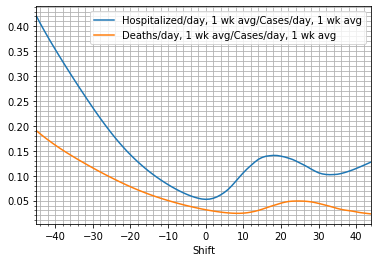

In [22]:
start = "2020/03/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

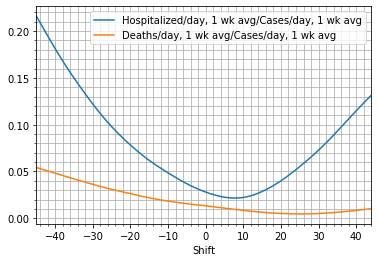

In [23]:
start = "2020/06/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

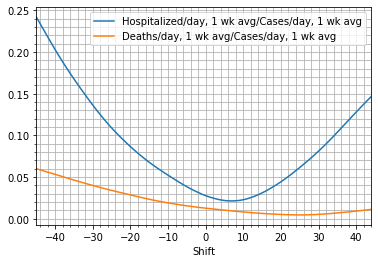

In [24]:
start = "2020/09/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

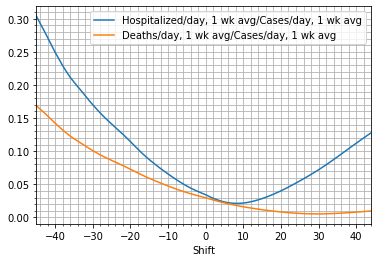

In [25]:
start = "2020/04/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

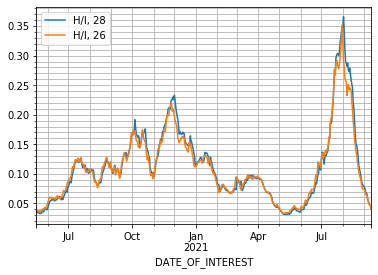

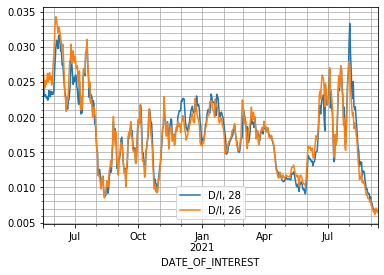

In [26]:
start = "2020/05/15"
shifts = [28, 26]

for numerator, col in zip(columns, ["H/I, {shift}", "D/I, {shift}"]):
    cols = []
    for shift in shifts:
        colname = col.format(shift=shift)
        cols.append(colname)
        dat[colname] = dat[numerator]/dat[denom].shift(shift)
    period = dat[dat.index > start]
    period[cols].plot()
    plt.show()

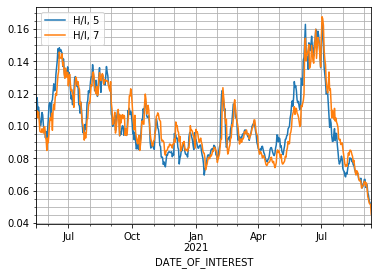

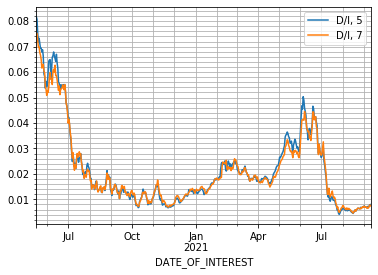

In [27]:
start = "2020/05/15"
shifts = [5, 7]

for numerator, col in zip(columns, ["H/I, {shift}", "D/I, {shift}"]):
    cols = []
    for shift in shifts:
        colname = col.format(shift=shift)
        cols.append(colname)
        dat[colname] = dat[numerator]/dat[denom].shift(shift)
    period = dat[dat.index > start]
    period[cols].plot()
    plt.show()

In [28]:
shifts = [7, 28]

for shift, name, numerator in zip(shifts, ratenames, columns):
    dat[name] = dat[numerator]/dat[denom].shift(shift)

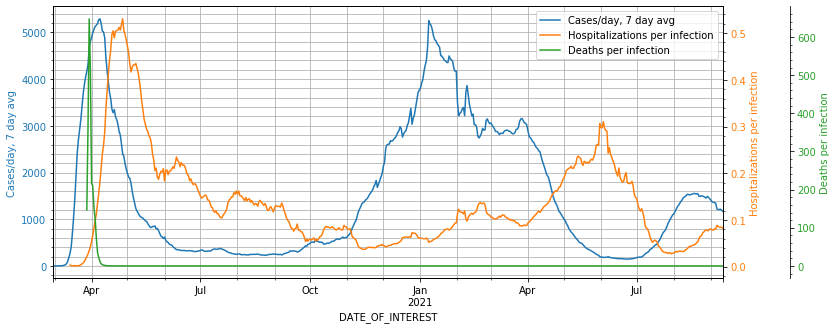

In [29]:
start = "2020/01/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

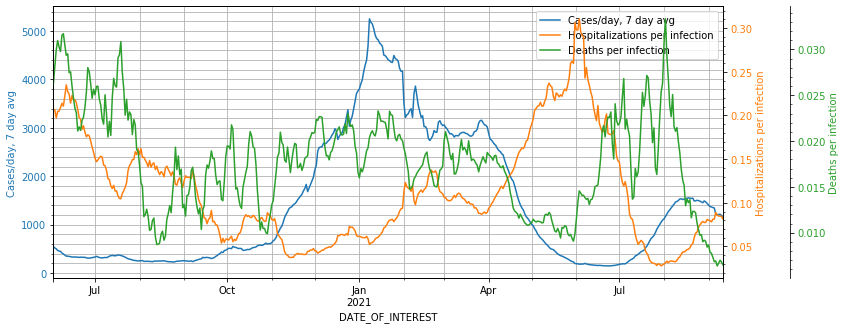

In [30]:
start = "2020/06/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

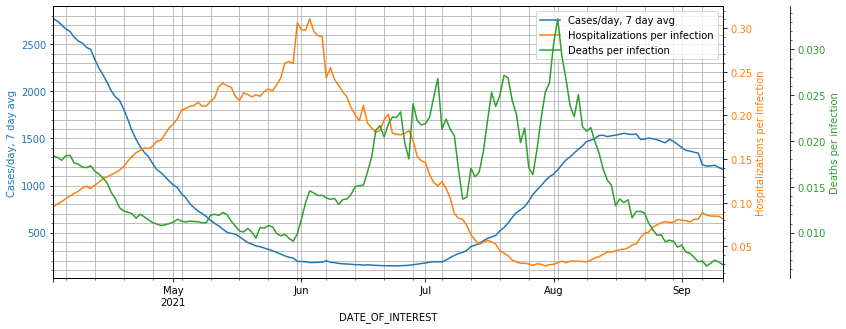

In [31]:
start = "2021/04/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## On an 4 week avg basis

In [32]:
wks = 4

In [33]:
columns = [f"Cases/day, {wks} wk avg", f"Hospitalized/day, {wks} wk avg", f"Deaths/day, {wks} wk avg"]
days = wks*7

dat = u.add_averages(dat,
                     in_cols = u.count_cols,
                     out_cols = columns,
                     window_size = f"{days}D")

denom = columns[0]
columns = columns[1:]

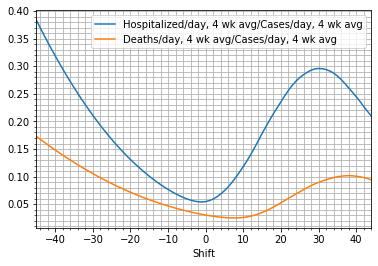

In [34]:
start = "2020/03/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

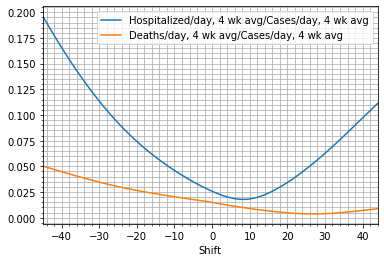

In [35]:
start = "2020/06/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

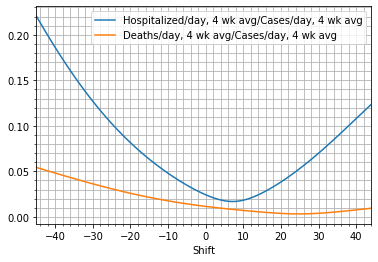

In [36]:
start = "2020/09/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

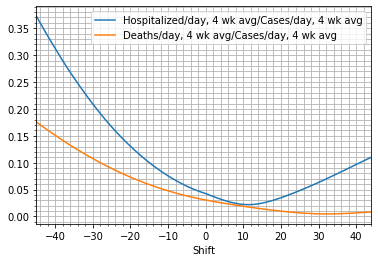

In [37]:
start = "2020/04/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

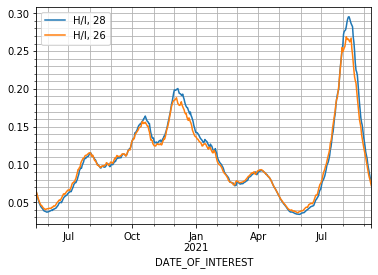

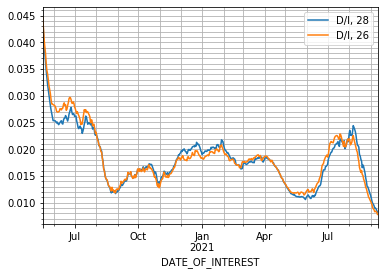

In [38]:
start = "2020/05/15"
shifts = [28, 26]

for numerator, col in zip(columns, ["H/I, {shift}", "D/I, {shift}"]):
    cols = []
    for shift in shifts:
        colname = col.format(shift=shift)
        cols.append(colname)
        dat[colname] = dat[numerator]/dat[denom].shift(shift)
    period = dat[dat.index > start]
    period[cols].plot()
    plt.show()

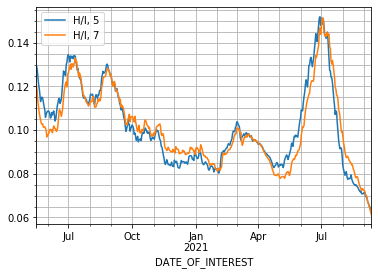

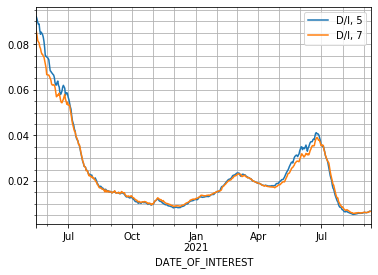

In [39]:
start = "2020/05/15"
shifts = [5, 7]

for numerator, col in zip(columns, ["H/I, {shift}", "D/I, {shift}"]):
    cols = []
    for shift in shifts:
        colname = col.format(shift=shift)
        cols.append(colname)
        dat[colname] = dat[numerator]/dat[denom].shift(shift)
    period = dat[dat.index > start]
    period[cols].plot()
    plt.show()

In [40]:
shifts = [7, 28]

for shift, name, numerator in zip(shifts, ratenames, columns):
    dat[name] = dat[numerator]/dat[denom].shift(shift)

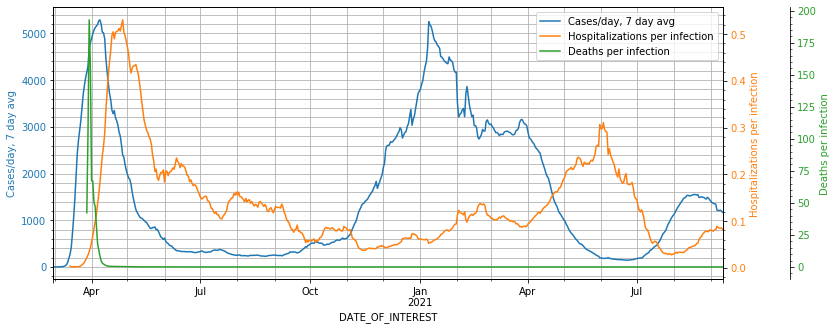

In [41]:
start = "2020/01/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

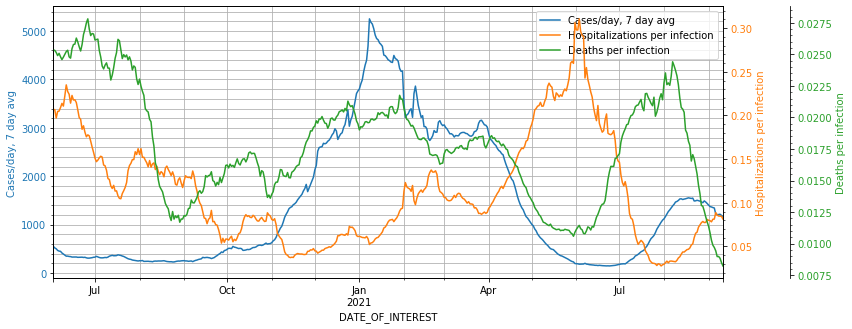

In [42]:
start = "2020/06/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

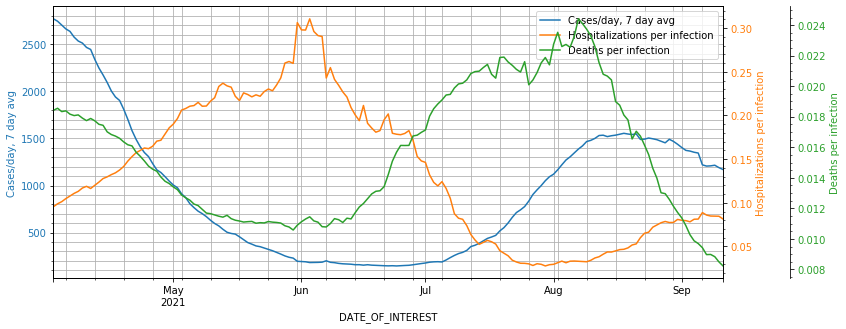

In [43]:
start = "2021/04/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## On a 12 week avg basis

In [44]:
wks = 12

In [45]:
columns = [f"Cases/day, {wks} wk avg", f"Hospitalized/day, {wks} wk avg", f"Deaths/day, {wks} wk avg"]
days = wks*7

dat = u.add_averages(dat,
                     in_cols = u.count_cols,
                     out_cols = columns,
                     window_size = f"{days}D")

denom = columns[0]
columns = columns[1:]

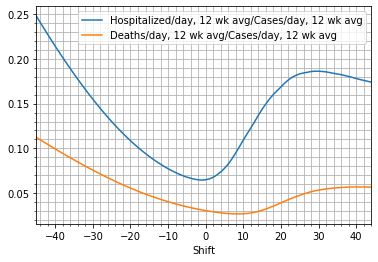

In [46]:
start = "2020/03/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

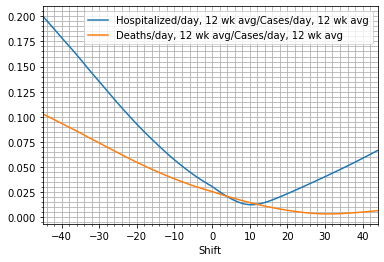

In [47]:
start = "2020/06/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

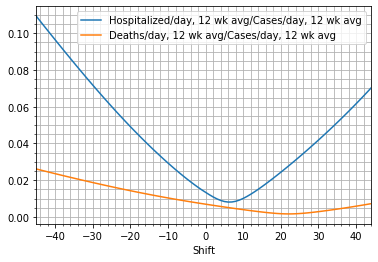

In [48]:
start = "2020/09/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

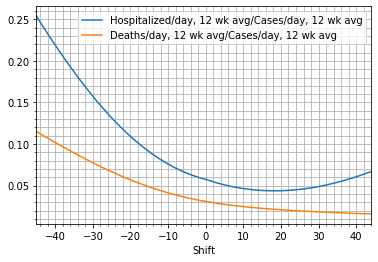

In [49]:
start = "2020/04/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

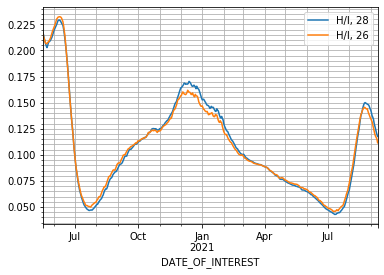

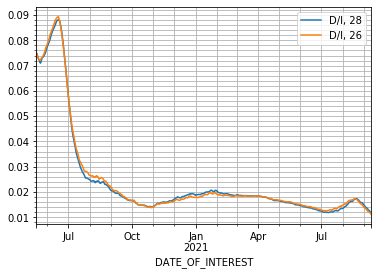

In [50]:
start = "2020/05/15"
shifts = [28, 26]

for numerator, col in zip(columns, ["H/I, {shift}", "D/I, {shift}"]):
    cols = []
    for shift in shifts:
        colname = col.format(shift=shift)
        cols.append(colname)
        dat[colname] = dat[numerator]/dat[denom].shift(shift)
    period = dat[dat.index > start]
    period[cols].plot()
    plt.show()

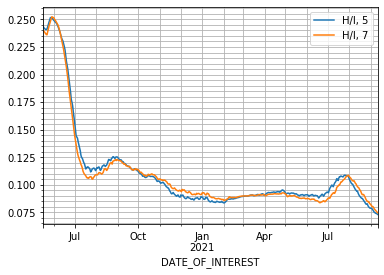

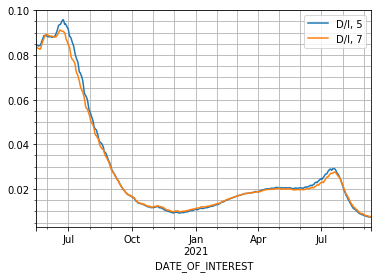

In [51]:
start = "2020/05/15"
shifts = [5, 7]

for numerator, col in zip(columns, ["H/I, {shift}", "D/I, {shift}"]):
    cols = []
    for shift in shifts:
        colname = col.format(shift=shift)
        cols.append(colname)
        dat[colname] = dat[numerator]/dat[denom].shift(shift)
    period = dat[dat.index > start]
    period[cols].plot()
    plt.show()

In [52]:
shifts = [7, 28]

for shift, name, numerator in zip(shifts, ratenames, columns):
    dat[name] = dat[numerator]/dat[denom].shift(shift)

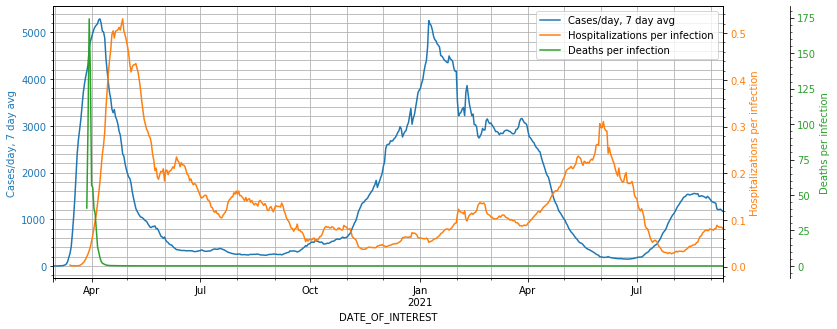

In [53]:
start = "2020/01/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

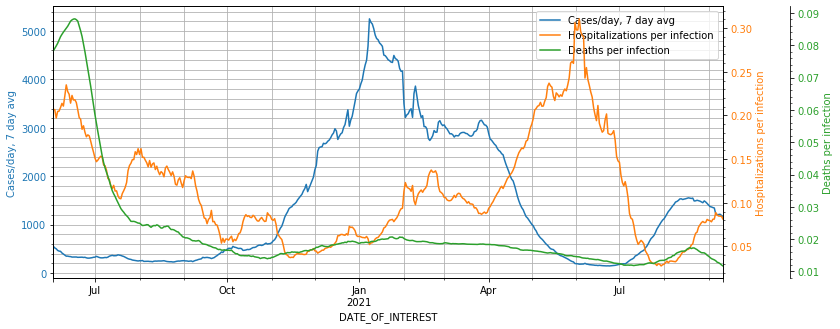

In [54]:
start = "2020/06/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

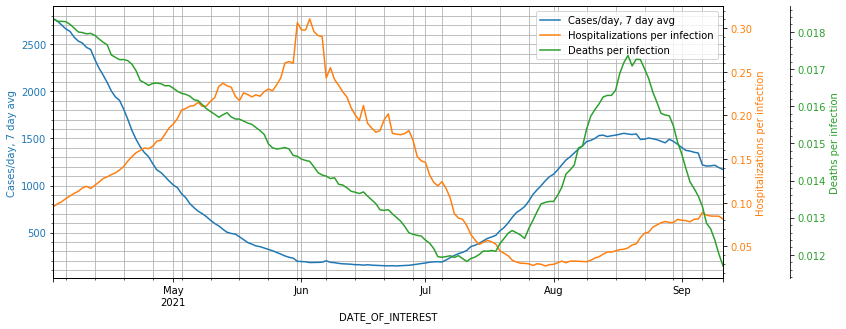

In [55]:
start = "2021/04/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## On an 16 week avg basis

In [56]:
wks = 16

In [57]:
columns = [f"Cases/day, {wks} wk avg", f"Hospitalized/day, {wks} wk avg", f"Deaths/day, {wks} wk avg"]
days = wks*7

dat = u.add_averages(dat,
                     in_cols = u.count_cols,
                     out_cols = columns,
                     window_size = f"{days}D")

denom = columns[0]
columns = columns[1:]

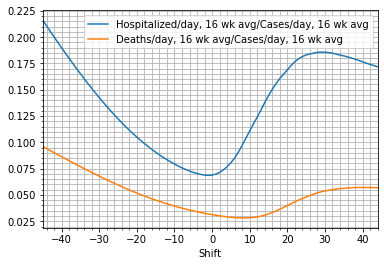

In [58]:
start = "2020/03/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

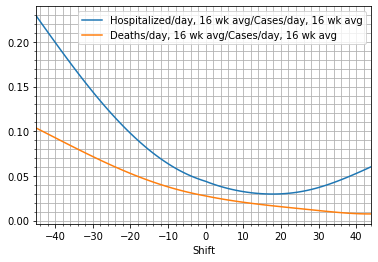

In [59]:
start = "2020/06/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

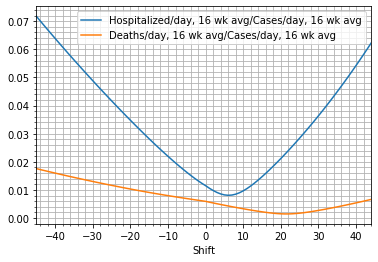

In [60]:
start = "2020/09/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

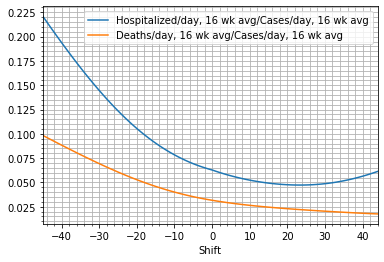

In [61]:
start = "2020/04/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

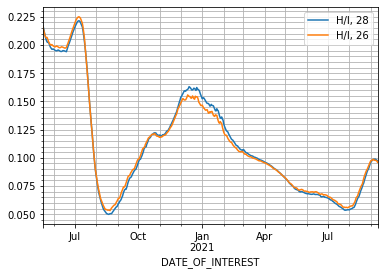

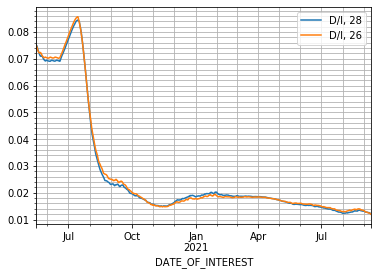

In [62]:
start = "2020/05/15"
shifts = [28, 26]

for numerator, col in zip(columns, ["H/I, {shift}", "D/I, {shift}"]):
    cols = []
    for shift in shifts:
        colname = col.format(shift=shift)
        cols.append(colname)
        dat[colname] = dat[numerator]/dat[denom].shift(shift)
    period = dat[dat.index > start]
    period[cols].plot()
    plt.show()

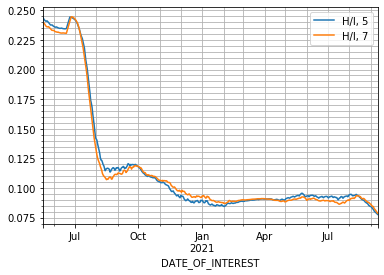

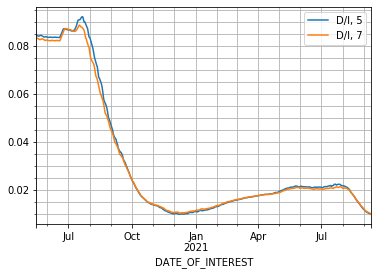

In [63]:
start = "2020/05/15"
shifts = [5, 7]

for numerator, col in zip(columns, ["H/I, {shift}", "D/I, {shift}"]):
    cols = []
    for shift in shifts:
        colname = col.format(shift=shift)
        cols.append(colname)
        dat[colname] = dat[numerator]/dat[denom].shift(shift)
    period = dat[dat.index > start]
    period[cols].plot()
    plt.show()

In [64]:
shifts = [7, 28]

for shift, name, numerator in zip(shifts, ratenames, columns):
    dat[name] = dat[numerator]/dat[denom].shift(shift)

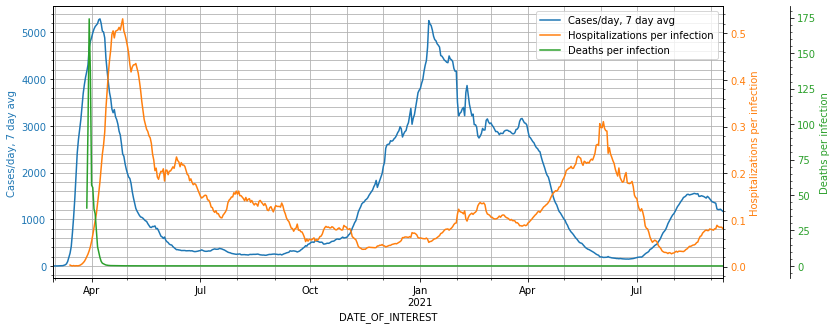

In [65]:
start = "2020/01/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

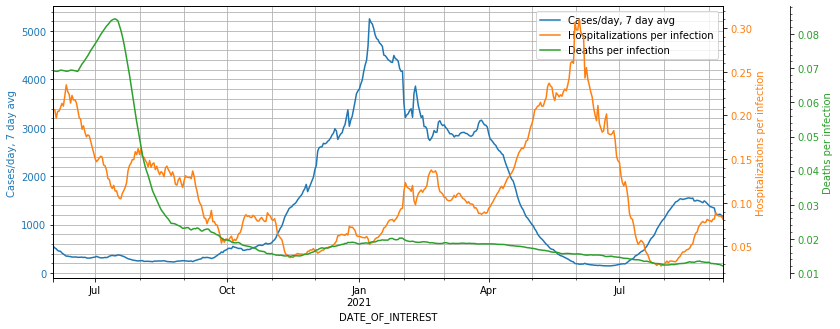

In [66]:
start = "2020/06/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

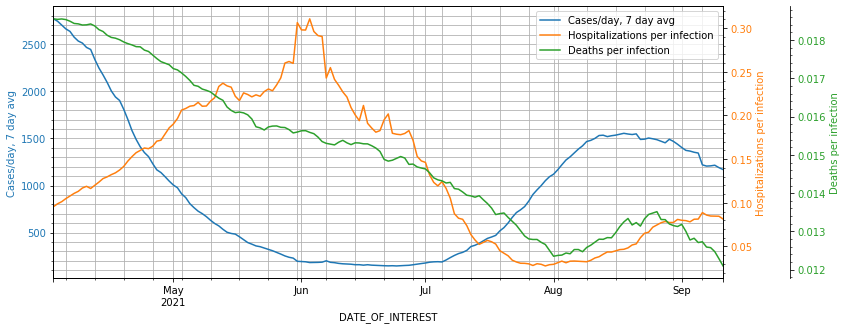

In [67]:
start = "2021/04/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

# Long term rate
Looking at overall rates per cases

In [68]:
dat = u.add_aggregates(dat)

In [69]:
shift = 7
dat["Total hospitalizations per infection"] = dat["Total hospitalized"]/dat["Total cases"].shift(shift)

shift = 28
dat["Total deaths per infection"] = dat["Total deaths"]/dat["Total cases"].shift(shift)

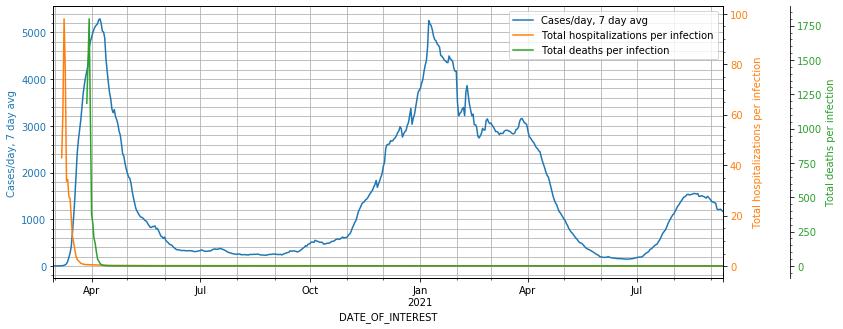

In [70]:
start = "2019/01/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Total hospitalizations per infection",
                     "Total deaths per infection"]], figsize=(12, 5))

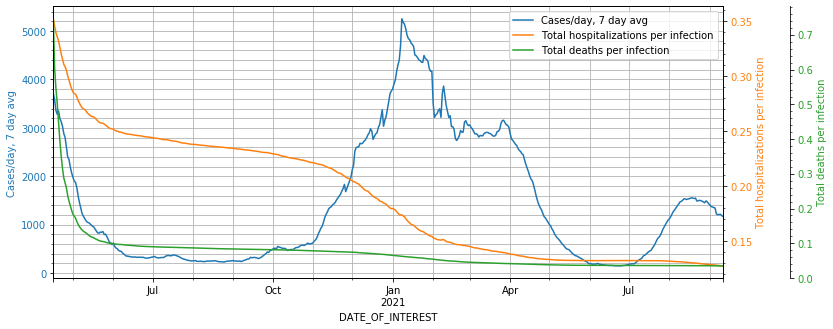

In [71]:
start = "2020/04/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Total hospitalizations per infection",
                     "Total deaths per infection"]], figsize=(12, 5))

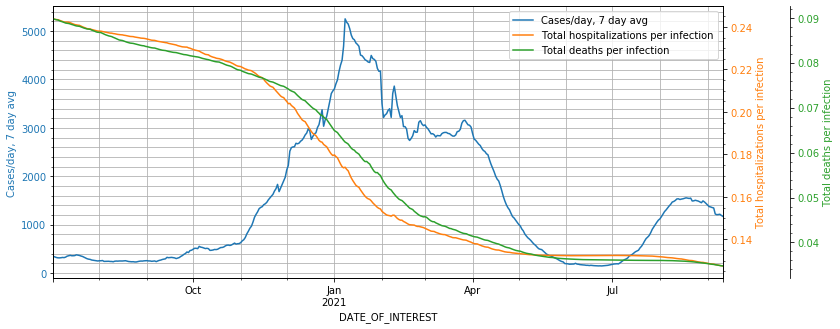

In [72]:
start = "2020/07/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Total hospitalizations per infection",
                     "Total deaths per infection"]], figsize=(12, 5))

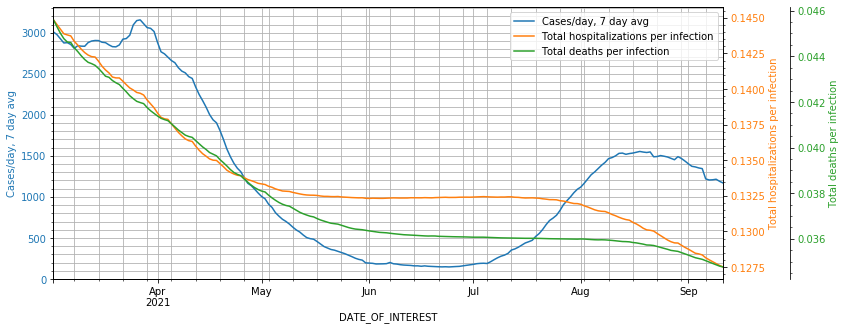

In [73]:
start = "2021/03/01"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Total hospitalizations per infection",
                     "Total deaths per infection"]], figsize=(12, 5))